In [1]:
import scanpy as sc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import my_functions as mf # to fetch my helper functions
## After I make changes to the functios in mf it sometime need reloading of teh current version
import importlib
importlib.reload(mf)

<module 'my_functions' from '/data/projects/zeba/MY_PROJECTS/240130_Xenium_ANCA_SLE_GBM/xenium-cgn/notebooks_zs/COMMON_GIT_FOLDER/13_Clinical_Correlation_VF_NoPT_clusters/my_functions.py'>

In [2]:
import os
out_dir = "output"
os.makedirs(out_dir, exist_ok=True)

## Clinical Data

In [3]:
file_path = os.path.join(out_dir,'ClinicalData_medianPC1.csv')
df_clinical_values = pd.read_csv(file_path)
df_clinical_values

,biopsy_nr,age,sex,albuminuria_gg,serum_creatinine,eGFR,disease,ARRscore_SLEclass,Biopsy_ID,Total_gloms_on_biopsy,Median_PC1
0,X6,81,männlich,0.010,1.20,55.000000,ANCA,ARRS low (0/11),X6,5,-0.181733
1,X3,55,weiblich,0.440,1.60,35.000000,ANCA,ARRS medium (2/11),X3,10,0.273051
2,X4,59,männlich,1.200,2.40,28.260000,ANCA,ARRS medium (2/11),X4,7,-0.102901
3,X17,72,weiblich,0.425,1.10,49.930000,ANCA,ARRS low (0/11),X17,14,0.365794
4,X25,52,männlich,3.250,3.70,17.590000,ANCA,ARRS high (8/11),X25,5,0.754072
5,X27,46,männlich,0.760,4.70,13.740000,ANCA,ARRS medium (5/11),X27,15,0.959444
6,X18,43,männlich,NaN,3.30,21.520000,ANCA,ARRS medium (2/11),X18,5,0.673121
7,X33,65,männlich,NaN,NaN,NaN,ANCA,na,X33,10,0.171400
8,X28,47,männlich,NaN,2.58,28.170000,ANCA,ARRS medium (2/11),X28,4,0.406449
9,X50,24,weiblich,NaN,0.63,125.070000,ANCA,ARRS low (0/11),X50,5,0.409695


## complete updated(X26) adata 

In [4]:
adata = sc.read_h5ad('/data/projects/zeba/MY_PROJECTS/240130_Xenium_ANCA_SLE_GBM/xenium-cgn/notebooks_zs/02_PeriglomDefinition_Sample26updated/output_dataobjects/adata_complete_reduced_withTransformedMC_X26updated.h5ad')

In [5]:
adata

AnnData object with n_obs × n_vars = 3218210 × 480
    obs: 'x', 'y', 'z', 'cluster', 'n_transcripts', 'density', 'elongation', 'area', 'avg_confidence', 'avg_assignment_confidence', 'max_cluster_frac', 'lifespan', 'x_centroid', 'y_centroid', 'cell_area', 'Slide_ID', 'batch', 'Patient_Sample_ID', 'Disease', 'n_genes', 'celltype_l1', 'celltype_l1_codes', 'celltype_l1_prob', 'Biopsy_ID', 'sample', 'label', 'nichepca_domain', 'nichepca_domain_tuned', 'nichepca_glom_no', 'glom_ID', 'polygon_flags', 'is_in_polygon', 'is_in_glom', 'is_in_periglom', 'Slide_num'
    var: 'gene_ids', 'feature_types'
    uns: 'celltype_l1_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap', 'spatial'
    varm: 'PCs'
    layers: 'counts'

In [6]:
adata.obs.head()

,x,y,z,cluster,n_transcripts,density,elongation,area,avg_confidence,avg_assignment_confidence,...,label,nichepca_domain,nichepca_domain_tuned,nichepca_glom_no,glom_ID,polygon_flags,is_in_polygon,is_in_glom,is_in_periglom,Slide_num
cell_CR4f0dee9aa-1,4221.533062,884.858780,30.842819,1,13,0.4426,3.256,29.37,0.9889,0.9415,...,SLE,Glom.,Other,Other,Other_0011762_SLE_X8,,False,False,False,Slide1
cell_CR4f0dee9aa-2,4198.105640,924.251868,33.608330,1,10,0.8071,1.651,12.39,0.9882,0.9820,...,SLE,Glom.,Other,Other,Other_0011762_SLE_X8,,False,False,False,Slide1
cell_CR4f0dee9aa-3,4556.540757,577.164783,28.919208,4,14,0.6986,3.840,20.04,0.9293,0.9314,...,SLE,Other,Other,Other,Other_0011762_SLE_X8,,False,False,False,Slide1
cell_CR4f0dee9aa-4,4218.637556,919.679331,31.852086,1,16,1.5040,1.853,10.64,0.9967,0.9988,...,SLE,Glom.,Other,Other,Other_0011762_SLE_X8,,False,False,False,Slide1
cell_CR4f0dee9aa-5,4252.774035,894.981226,27.879542,2,20,0.6283,3.569,31.83,0.9899,0.9020,...,SLE,Glom.,Other,Other,Other_0011762_SLE_X8,,False,False,False,Slide1


In [7]:
## Selecting the cells from glom
adata_glom = adata[adata.obs.is_in_glom]
adata_glom = adata_glom[adata_glom.obs.Biopsy_ID.astype(str)!="nan"]
adata_glom.shape

(169753, 480)

### Selecting only PECs

In [8]:
adata_PECs = adata_glom[adata_glom.obs["celltype_l1"]=="PEC"]
adata_PECs

View of AnnData object with n_obs × n_vars = 22086 × 480
    obs: 'x', 'y', 'z', 'cluster', 'n_transcripts', 'density', 'elongation', 'area', 'avg_confidence', 'avg_assignment_confidence', 'max_cluster_frac', 'lifespan', 'x_centroid', 'y_centroid', 'cell_area', 'Slide_ID', 'batch', 'Patient_Sample_ID', 'Disease', 'n_genes', 'celltype_l1', 'celltype_l1_codes', 'celltype_l1_prob', 'Biopsy_ID', 'sample', 'label', 'nichepca_domain', 'nichepca_domain_tuned', 'nichepca_glom_no', 'glom_ID', 'polygon_flags', 'is_in_polygon', 'is_in_glom', 'is_in_periglom', 'Slide_num'
    var: 'gene_ids', 'feature_types'
    uns: 'celltype_l1_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap', 'spatial'
    varm: 'PCs'
    layers: 'counts'

In [9]:
df_PECs = adata_PECs.to_df(layer="counts")
df_PECs # Counts for the individual PECs

,ABCC3,ABR,ACKR3,ACSM3,ACTA2,ADAM17,ADAMTS5,AFDN,AHR,ALDH1A2,...,VIM,VSIG4,WT1,XCL1,XCL2,XCR1,XG,ZAP70,ZEB2,ZNF683
cell_CR4f0dee9aa-1973,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cell_CR4f0dee9aa-2586,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cell_CR4f0dee9aa-2587,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cell_CR4f0dee9aa-2624,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cell_CR4f0dee9aa-2630,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cell_CR4113b3b6d-444745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cell_CR4113b3b6d-446024,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cell_CR4113b3b6d-447363,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cell_CR4113b3b6d-449627,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
df_PECs = pd.concat([df_PECs, adata_PECs.obs[["polygon_flags"]]], axis=1)
df_PECs

,ABCC3,ABR,ACKR3,ACSM3,ACTA2,ADAM17,ADAMTS5,AFDN,AHR,ALDH1A2,...,VSIG4,WT1,XCL1,XCL2,XCR1,XG,ZAP70,ZEB2,ZNF683,polygon_flags
cell_CR4f0dee9aa-1973,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0_0011762_SLE_X8
cell_CR4f0dee9aa-2586,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1_0011762_SLE_X8
cell_CR4f0dee9aa-2587,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1_0011762_SLE_X8
cell_CR4f0dee9aa-2624,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1_0011762_SLE_X8
cell_CR4f0dee9aa-2630,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1_0011762_SLE_X8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cell_CR4113b3b6d-444745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8_0018775_ANCA_X63
cell_CR4113b3b6d-446024,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7_0018775_ANCA_X60
cell_CR4113b3b6d-447363,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4_0018775_ANCA_X63
cell_CR4113b3b6d-449627,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1_0018775_SLE_X61


In [11]:
# Remove polygon_flags with ',' in the name
df_PECs = df_PECs[~df_PECs.polygon_flags.str.contains(',')]
df_PECs

,ABCC3,ABR,ACKR3,ACSM3,ACTA2,ADAM17,ADAMTS5,AFDN,AHR,ALDH1A2,...,VSIG4,WT1,XCL1,XCL2,XCR1,XG,ZAP70,ZEB2,ZNF683,polygon_flags
cell_CR4f0dee9aa-1973,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0_0011762_SLE_X8
cell_CR4f0dee9aa-2586,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1_0011762_SLE_X8
cell_CR4f0dee9aa-2587,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1_0011762_SLE_X8
cell_CR4f0dee9aa-2624,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1_0011762_SLE_X8
cell_CR4f0dee9aa-2630,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1_0011762_SLE_X8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cell_CR4113b3b6d-444745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8_0018775_ANCA_X63
cell_CR4113b3b6d-446024,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7_0018775_ANCA_X60
cell_CR4113b3b6d-447363,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4_0018775_ANCA_X63
cell_CR4113b3b6d-449627,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1_0018775_SLE_X61


In [12]:
# Split the 'polygon_flags' column into multiple columns and assign column names directly
df_PECs = df_PECs.copy()

df_PECs[['Glom_no', 'Slide_ID', 'Disease', 'Biopsy_ID']] = df_PECs['polygon_flags'].str.split('_', expand=True)
df_PECs = df_PECs.drop(columns=['polygon_flags'])
df_PECs

,ABCC3,ABR,ACKR3,ACSM3,ACTA2,ADAM17,ADAMTS5,AFDN,AHR,ALDH1A2,...,XCL2,XCR1,XG,ZAP70,ZEB2,ZNF683,Glom_no,Slide_ID,Disease,Biopsy_ID
cell_CR4f0dee9aa-1973,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0011762,SLE,X8
cell_CR4f0dee9aa-2586,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0011762,SLE,X8
cell_CR4f0dee9aa-2587,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0011762,SLE,X8
cell_CR4f0dee9aa-2624,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0011762,SLE,X8
cell_CR4f0dee9aa-2630,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0011762,SLE,X8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cell_CR4113b3b6d-444745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8,0018775,ANCA,X63
cell_CR4113b3b6d-446024,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,7,0018775,ANCA,X60
cell_CR4113b3b6d-447363,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4,0018775,ANCA,X63
cell_CR4113b3b6d-449627,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0018775,SLE,X61


### Viz1: Pathway activity scores for PECs of one patient/biopsy

In [13]:
print(df_PECs.dtypes)

ABCC3        float32
ABR          float32
ACKR3        float32
ACSM3        float32
ACTA2        float32
              ...   
ZNF683       float32
Glom_no       object
Slide_ID      object
Disease       object
Biopsy_ID     object
Length: 484, dtype: object


In [14]:
# Get the names of the numeric columns
numeric_cols = df_PECs.select_dtypes(include=["number"]).columns

# Group by 'Biopsy_ID' and calculate the mean for numeric columns
gene_counts_PECs = df_PECs.groupby("Biopsy_ID")[numeric_cols].mean()
gene_counts_PECs

,ABCC3,ABR,ACKR3,ACSM3,ACTA2,ADAM17,ADAMTS5,AFDN,AHR,ALDH1A2,...,VIM,VSIG4,WT1,XCL1,XCL2,XCR1,XG,ZAP70,ZEB2,ZNF683
Biopsy_ID,,,,,,,,,,,,,,,,,,,,,
X1,0.183007,0.140523,0.000000,0.071895,0.029412,0.075163,0.032680,0.539216,0.107843,0.624183,...,0.117647,0.006536,0.366013,0.000000,0.000000,0.000000,0.000000,0.000000,0.140523,0.006536
X10,0.068729,0.130584,0.005155,0.058419,0.003436,0.058419,0.017182,0.613402,0.080756,0.450172,...,0.039519,0.000000,0.302406,0.003436,0.000000,0.000000,0.000000,0.001718,0.094502,0.003436
X12,0.556561,0.235294,0.000000,0.239819,0.099548,0.126697,0.153846,0.497738,0.217195,0.579186,...,0.628959,0.018100,0.511312,0.009050,0.004525,0.009050,0.009050,0.013575,0.330317,0.018100
X13,0.736607,0.265625,0.004464,0.060268,0.156250,0.120536,0.071429,0.390625,0.337054,0.305804,...,1.008929,0.031250,0.294643,0.015625,0.006696,0.008929,0.013393,0.004464,0.247768,0.015625
X14,0.634615,0.346154,0.006410,0.173077,0.064103,0.173077,0.051282,0.461538,0.282051,0.628205,...,1.108974,0.025641,0.448718,0.000000,0.019231,0.006410,0.000000,0.006410,0.307692,0.006410
X15,0.207373,0.147465,0.009217,0.110599,0.027650,0.069124,0.073733,0.442396,0.211982,0.447005,...,0.382488,0.013825,0.304147,0.023041,0.004608,0.000000,0.004608,0.004608,0.225806,0.018433
X16,0.697297,0.421622,0.005405,0.537838,0.048649,0.205405,0.075676,1.151351,0.654054,0.870270,...,1.016216,0.029730,0.848649,0.032432,0.008108,0.008108,0.002703,0.000000,0.413514,0.016216
X17,0.496528,0.128472,0.010417,0.076389,0.055556,0.083333,0.055556,0.340278,0.184028,0.340278,...,0.378472,0.027778,0.309028,0.031250,0.003472,0.000000,0.003472,0.003472,0.118056,0.003472
X18,0.619048,0.285714,0.047619,0.130952,0.035714,0.250000,0.190476,0.690476,0.261905,0.797619,...,1.071429,0.000000,0.404762,0.023810,0.011905,0.000000,0.011905,0.000000,0.309524,0.011905


## Creating anndata object using the matrix of mean counts of genes for PECs of each biopsy

In [15]:
from anndata import AnnData

# Set Biopsy_ID as index for easier alignment
df_clinical_indexed = df_clinical_values.set_index('Biopsy_ID')

# Now align obs using gene_counts_PECs.index
adata_glom_PECs = AnnData(gene_counts_PECs, obs=df_clinical_indexed.loc[gene_counts_PECs.index])


In [16]:
#from anndata import AnnData
# Create AnnData object
#adata_glom_PECs = AnnData(gene_counts_PECs, obs=df_summary.loc[gene_counts_PECs.index])


In [17]:
sc.pp.normalize_total(adata_glom_PECs)
sc.pp.log1p(adata_glom_PECs)
adata_glom_PECs.obs.head()

,biopsy_nr,age,sex,albuminuria_gg,serum_creatinine,eGFR,disease,ARRscore_SLEclass,Total_gloms_on_biopsy,Median_PC1
Biopsy_ID,,,,,,,,,,
X1,X1,54,female,NaN,0.57,106.000000,Liposarcoma retroperitoneal,NaN,36,-0.564160
X10,X10,61,female,NaN,0.72,90.000000,Transitional cell carcinoma,NaN,64,-0.776936
X12,X12,73,männlich,4.058,2.40,25.790001,ANCA,ARRS low (0/11),3,0.523362
X13,X13,26,männlich,1.730,9.40,6.840000,GBM,82% gloms affected,12,1.078501
X14,X14,55,weiblich,0.172,1.86,29.809999,ANCA,ARRS low (0/11),10,0.391004


In [18]:
tmp = adata_glom_PECs.copy() 

In [19]:
### TGFB pathway #####
#https://www.gsea-msigdb.org/gsea/msigdb/human/geneset/HALLMARK_TGF_BETA_SIGNALING.html
tgf_genes_hallmarkMsig = ["ACVR1", "APC", "ARID4B", "BCAR3", "BMP2", "BMPR1A", "BMPR2", "CDH1", "CDK9",
                        "CDKN1C", "CTNNB1", "ENG", "FKBP1A", "FNTA", "FURIN", "HDAC1", "HIPK2", "ID1",
                        "ID2", "ID3", "IFNGR2", "JUNB", "KLF10", "LEFTY2", "LTBP2", "MAP3K7", "NCOR2",
                        "NOG", "PMEPA1", "PPM1A", "PPP1CA", "PPP1R15A", "RAB31", "RHOA", "SERPINE1",
                        "SKI", "SKIL", "SLC20A1", "SMAD1", "SMAD3", "SMAD6", "SMAD7", "SMURF1", "SMURF2",
                        "SPTBN1", "TGFB1", "TGFBR1", "TGIF1", "THBS1", "TJP1", "TRIM33", "UBE2D3",
                        "WWTR1", "XIAP"]
tgf_genes = [e for e in tmp.var.index.tolist() if
              e in [ "TGFB1", "TGFBI", "TGFBR1", "TGFBR2"] or
              e in tgf_genes_hallmarkMsig ]

tgf_genes = sorted(list(set(tgf_genes)))

In [20]:
#https://www.gsea-msigdb.org/gsea/msigdb/human/geneset/REACTOME_SIGNALING_BY_PDGFR_IN_DISEASE.html
pdgf_Reactome = [ "PIK3CB", "PIK3R2", "KANK1", "BIN2", "WDR48", "STAT1", "STRN", "SOS1",
                         "PIK3CA", "KDR", "KRAS", "PDGFRA", "ETV6", "GOLGA4", "FIP1L1", "PIK3R1",
                         "STAT3", "HRAS", "GRB2", "NRAS", "HRAS"]
pdgf_genes_Reactome = [e for e in tmp.var.index.tolist() if
              e in ["PDGFA", "PDGFB", "PDGFRB", "PDGFRA"] or
              e in pdgf_Reactome]

pdgf_genes_Reactome = sorted(list(set(pdgf_genes_Reactome)))

In [21]:
sc.tl.score_genes(tmp, tgf_genes, score_name="TGFB_score", use_raw=False)
sc.tl.score_genes(tmp, pdgf_genes_Reactome, score_name="PDGF_score", use_raw=False)

/tmp/ipykernel_16158/3510313035.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  obs1["expression_score"] = tmp.obs["PDGF_score"].tolist()
/tmp/ipykernel_16158/3510313035.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  obs1["gene_group"] = "PDGF"
/tmp/ipykernel_16158/3510313035.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

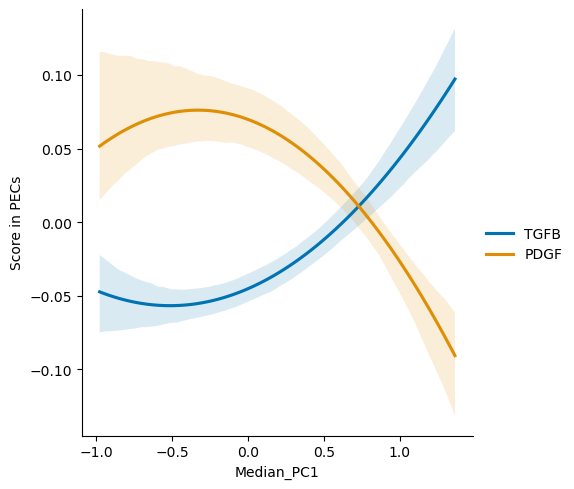

In [22]:
obs1 = tmp.obs[["Median_PC1"]]
obs1["expression_score"] = tmp.obs["PDGF_score"].tolist()
obs1["gene_group"] = "PDGF"

obs2 = tmp.obs[["Median_PC1"]]
obs2["expression_score"] = tmp.obs["TGFB_score"].tolist()
obs2["gene_group"] = "TGFB"

obs = pd.concat([obs2, obs1], axis=0)

ax=sns.lmplot(data=obs,x="Median_PC1",y="expression_score", hue="gene_group", order=2, scatter=False, palette="colorblind")
ax.set_ylabels("Score in PECs")
ax.legend.set_title("")

file_name = os.path.join(out_dir,"PDGF_TGFb_Score_PECs.png" )
plt.savefig(file_name, bbox_inches="tight")

In [23]:
obs = obs.reset_index()
obs

,Biopsy_ID,Median_PC1,expression_score,gene_group
0,X1,-0.564160,-0.085994,TGFB
1,X10,-0.776936,-0.048349,TGFB
2,X12,0.523362,-0.029143,TGFB
3,X13,1.078501,0.089747,TGFB
4,X14,0.391004,0.062303,TGFB
...,...,...,...,...
113,X62,0.033798,0.078729,PDGF
114,X63,1.255328,-0.058256,PDGF
115,X7,-0.136512,0.111518,PDGF
116,X8,-0.449402,0.156625,PDGF


In [24]:
# Pivot wider on the DataFrame
df_Biopsy_TGF_PDGF_scores = obs.pivot(index='Biopsy_ID', columns='gene_group', values='expression_score')

# Rename columns to include '_score' for clarity
df_Biopsy_TGF_PDGF_scores = df_Biopsy_TGF_PDGF_scores.rename(columns={'TGFB': 'TGFB_score', 'PDGF': 'PDGF_score'}).reset_index()

df_Biopsy_TGF_PDGF_scores


gene_group,Biopsy_ID,PDGF_score,TGFB_score
0,X1,0.055359,-0.085994
1,X10,0.052862,-0.048349
2,X12,0.029124,-0.029143
3,X13,-0.018765,0.089747
4,X14,0.016215,0.062303
5,X15,0.016761,-0.048812
6,X16,0.020082,-0.019679
7,X17,-0.013364,0.006315
8,X18,0.050914,-0.023081
9,X19,-0.018824,0.132439


## Merged Data 

In [25]:
merged_df = pd.merge(df_clinical_values, df_Biopsy_TGF_PDGF_scores, left_on='biopsy_nr', right_on='Biopsy_ID', how='inner')

In [26]:
merged_df

,biopsy_nr,age,sex,albuminuria_gg,serum_creatinine,eGFR,disease,ARRscore_SLEclass,Biopsy_ID_x,Total_gloms_on_biopsy,Median_PC1,Biopsy_ID_y,PDGF_score,TGFB_score
0,X6,81,männlich,0.010,1.20,55.000000,ANCA,ARRS low (0/11),X6,5,-0.181733,X6,0.071615,-0.050879
1,X3,55,weiblich,0.440,1.60,35.000000,ANCA,ARRS medium (2/11),X3,10,0.273051,X3,0.033278,-0.012686
2,X4,59,männlich,1.200,2.40,28.260000,ANCA,ARRS medium (2/11),X4,7,-0.102901,X4,0.099061,-0.016206
3,X17,72,weiblich,0.425,1.10,49.930000,ANCA,ARRS low (0/11),X17,14,0.365794,X17,-0.013364,0.006315
4,X25,52,männlich,3.250,3.70,17.590000,ANCA,ARRS high (8/11),X25,5,0.754072,X25,-0.008430,-0.018240
5,X27,46,männlich,0.760,4.70,13.740000,ANCA,ARRS medium (5/11),X27,15,0.959444,X27,-0.018317,0.010588
6,X18,43,männlich,NaN,3.30,21.520000,ANCA,ARRS medium (2/11),X18,5,0.673121,X18,0.050914,-0.023081
7,X33,65,männlich,NaN,NaN,NaN,ANCA,na,X33,10,0.171400,X33,0.030678,-0.030193
8,X28,47,männlich,NaN,2.58,28.170000,ANCA,ARRS medium (2/11),X28,4,0.406449,X28,0.099231,-0.034074
9,X50,24,weiblich,NaN,0.63,125.070000,ANCA,ARRS low (0/11),X50,5,0.409695,X50,-0.007260,0.016967


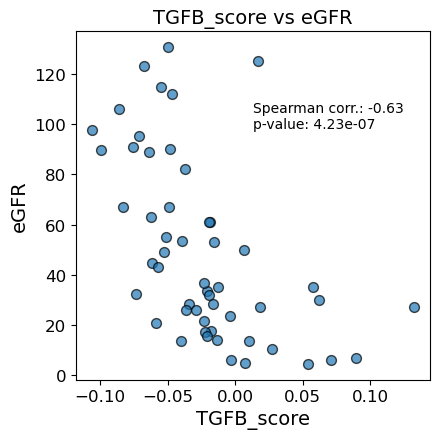

In [27]:
mf.plot_correlation_scatter(
    merged_df, 
    'TGFB_score', 
    'eGFR', 
    label_pos=[0.5, 0.8],
    method='spearman'
)



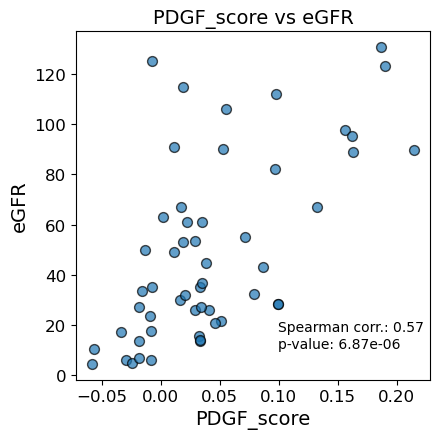

In [28]:
mf.plot_correlation_scatter(
    merged_df, 
    'PDGF_score', 
    'eGFR', 
    label_pos=[0.57, 0.17],
    method='spearman'
)

## For only ANCA patients : correlation with ARR score

In [29]:
ANCA_patients=merged_df[merged_df["disease"] == 'ANCA']

ANCA_patients = ANCA_patients.copy()

ANCA_patients['ARRscore'] = ANCA_patients['ARRscore_SLEclass'].str.extract(r'\((\d+)/')

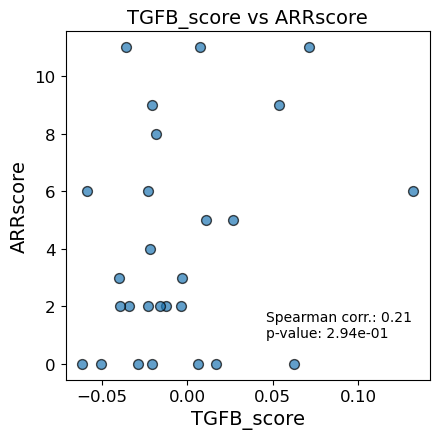

In [30]:
mf.plot_correlation_scatter(
    ANCA_patients, 
    'TGFB_score', 
    'ARRscore', 
    label_pos=[0.55, 0.2],
    method='spearman'
)